# Player Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [2]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [3]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 24)

In [5]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,2,0,0,0,0,2,2,NaN,NaN


## Taking in Consideration only KKR VS KXIP matches

In [6]:
KKR_KXIP =matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Kings XI Punjab'),
                            np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Kings XI Punjab'))]

cond1 = KKR_KXIP["season"] == 2015
cond2 = KKR_KXIP["season"] == 2016
cond3 = KKR_KXIP["season"] == 2017
cond4 = KKR_KXIP["season"] == 2018
cond5 = KKR_KXIP["season"] == 2019
KKR_KXIP = KKR_KXIP[cond1|cond2|cond3|cond4|cond5]

In [7]:
KKR_KXIP.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
2355,11,2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Kings XI Punjab,Kolkata Knight Riders,...,TA Boult,0,0,0,0,0,0,0,NaN,NaN
2356,11,2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Kings XI Punjab,Kolkata Knight Riders,...,TA Boult,0,0,0,0,4,0,4,NaN,NaN
2357,11,2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Kings XI Punjab,Kolkata Knight Riders,...,TA Boult,0,0,0,0,0,0,0,NaN,NaN
2358,11,2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Kings XI Punjab,Kolkata Knight Riders,...,TA Boult,0,0,0,0,2,0,2,NaN,NaN
2359,11,2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,Kings XI Punjab,Kolkata Knight Riders,...,TA Boult,0,0,0,0,4,0,4,NaN,NaN


In [8]:
KKR_KXIP.match_id.nunique()

10

In [9]:
KKR_KXIP.season.unique()

array([2017, 2015, 2016, 2018, 2019], dtype=int64)

## Dot balls in the entire match

In [10]:
dot_ball = KKR_KXIP[KKR_KXIP["total_runs"]==0]

In [11]:
dot_ball_overall = pd.DataFrame(dot_ball.groupby(["match_id"])["total_runs"].count())

dot_ball_overall.columns = ["dot balls"]

dot_ball_overall

,dot balls
match_id,
11,79
48,75
532,88
560,80
589,73
608,75
7911,60
7937,63
11142,81


In [12]:
dot_ball_overall.describe().T

,count,mean,std,min,25%,50%,75%,max
dot balls,10.0,74.0,8.75595,60.0,67.75,75.0,79.75,88.0


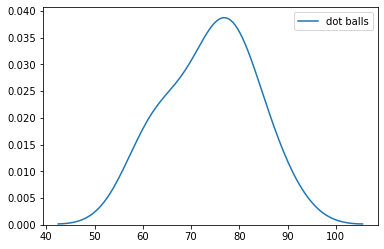

In [13]:
sns.kdeplot(dot_ball_overall["dot balls"])

Text(0.5, 1.0, 'No of dot balls in KKR VS KXIP')

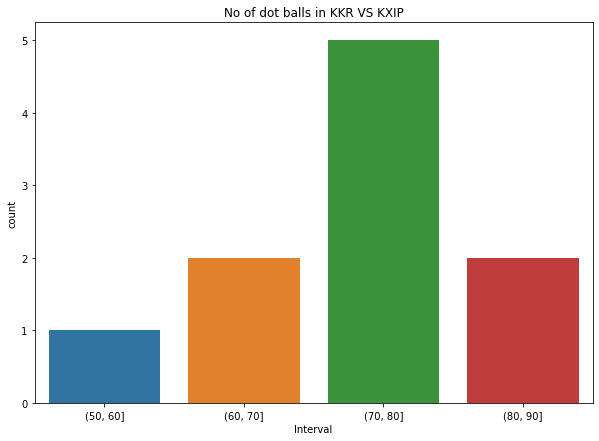

In [14]:
plt.figure(figsize=(10,7))
dot_ball_overall["Interval"] = pd.cut(dot_ball_overall["dot balls"],[50,60,70,80,90])
sns.countplot(dot_ball_overall["Interval"])
plt.title("No of dot balls in KKR VS KXIP")

In [15]:
print("Average no of dot balls bowled in KKR VS KXIP matches :{}".format(round(dot_ball_overall["dot balls"].mean())))

Average no of dot balls bowled in KKR VS KXIP matches :74


### Inning wise

- First Inning

In [16]:
first_dot = dot_ball[dot_ball["inning"]==1]

In [17]:
first_dot_ball = pd.DataFrame(first_dot.groupby(["match_id"])["total_runs"].count())

first_dot_ball.columns = ["dot balls"]

first_dot_ball

,dot balls
match_id,
11,54
48,37
532,46
560,40
589,43
608,29
7911,35
7937,31
11142,40


In [18]:
first_dot_ball.describe().T

,count,mean,std,min,25%,50%,75%,max
dot balls,10.0,39.1,7.340148,29.0,35.25,38.5,42.25,54.0


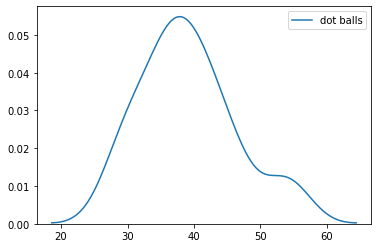

In [19]:
sns.kdeplot(first_dot_ball["dot balls"])

Text(0.5, 1.0, 'No of dot balls in 1st innings')

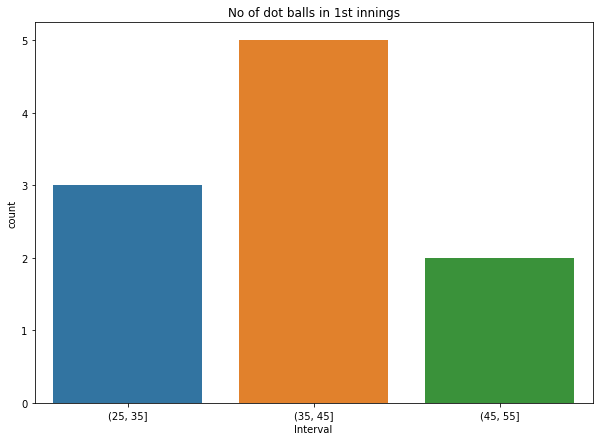

In [20]:
plt.figure(figsize=(10,7))
first_dot_ball["Interval"] = pd.cut(first_dot_ball["dot balls"],[25,35,45,55])
sns.countplot(first_dot_ball["Interval"])
plt.title("No of dot balls in 1st innings")

In [21]:
print("Average no of dot balls bowled in 1st innings :{}".format(round(first_dot_ball["dot balls"].mean())))

Average no of dot balls bowled in 1st innings :39


- 2nd Innings

In [22]:
second_dot = dot_ball[dot_ball["inning"]==2]

In [23]:
second_dot_ball = pd.DataFrame(second_dot.groupby(["match_id"])["total_runs"].count())

second_dot_ball.columns = ["dot balls"]

second_dot_ball

,dot balls
match_id,
11,25
48,38
532,42
560,40
589,30
608,46
7911,25
7937,32
11142,41


In [24]:
second_dot_ball.describe().T

,count,mean,std,min,25%,50%,75%,max
dot balls,10.0,34.9,7.445356,25.0,30.0,35.0,40.75,46.0


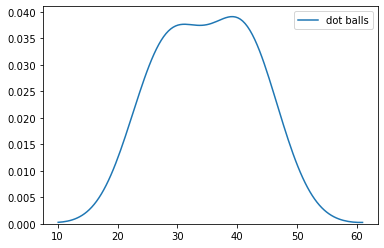

In [25]:
sns.kdeplot(second_dot_ball["dot balls"])

Text(0.5, 1.0, 'No of dot balls in 2nd innings')

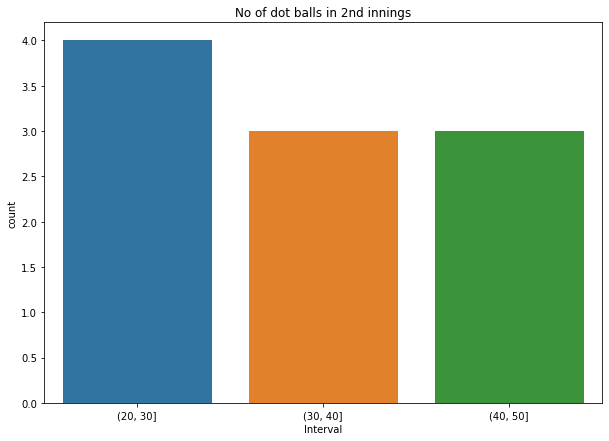

In [26]:
plt.figure(figsize=(10,7))
second_dot_ball["Interval"] = pd.cut(second_dot_ball["dot balls"],[20,30,40,50])
sns.countplot(second_dot_ball["Interval"])
plt.title("No of dot balls in 2nd innings")

In [27]:
print("Average no of dot balls bowled in 2nd innings :{}".format(round(second_dot_ball["dot balls"].mean())))

Average no of dot balls bowled in 2nd innings :35


## Confidence Interval

In [28]:
mean = dot_ball_overall["dot balls"].mean()
sd = dot_ball_overall["dot balls"].std()
n = len(dot_ball_overall["dot balls"])

n

10

In [29]:
tstar = 2.064
se = sd/np.sqrt(n)
se

2.7688746209726918

In [30]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)


print("95% Confidence Interval for the dot balls than can be bowled in KKR VS KXIP match :{}".format((lcb, ucb)))

95% Confidence Interval for the dot balls than can be bowled in KKR VS KXIP match :(68.0, 80.0)


From all the above analysis of overall and inning wise dot balls we can see that almost similar no of dot balls are being bowled in these two team's clash . So, we can predict that 60-90 dot balls are expected to be bowled in this match also.

## Wicket fall from 16th over to 20th over 

In [31]:
overs = KKR_KXIP[(KKR_KXIP["over"]>15)&(KKR_KXIP["over"]<=20)]

In [32]:
overs.over.unique()

array([16, 17, 18, 19, 20], dtype=int64)

In [33]:
wickets = pd.DataFrame(overs.groupby(['match_id'])["player_dismissed"].count())

wickets.columns = ["wickets"]

print("Wicket fall between 91th ball to 120th ball :")

wickets

Wicket fall between 91th ball to 120th ball :


,wickets
match_id,
11,5
48,6
532,5
560,7
589,4
608,7
7911,4
7937,6
11142,2


In [34]:
wickets.describe().T

,count,mean,std,min,25%,50%,75%,max
wickets,10.0,4.8,1.813529,2.0,4.0,5.0,6.0,7.0


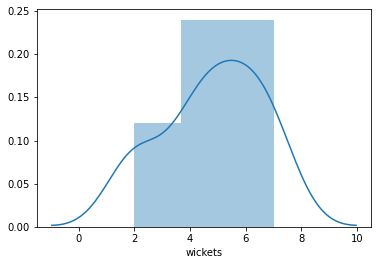

In [35]:
sns.distplot(wickets['wickets'])

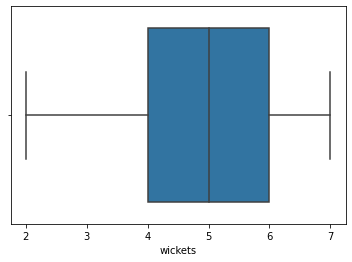

In [36]:
sns.boxplot(wickets['wickets'])

In [37]:
print("Average wicket fall between 91-120 balls in KKR VS KXIP matches  :{}".format(round(wickets["wickets"].mean())))

Average wicket fall between 91-120 balls in KKR VS KXIP matches  :5


### Inning Wise

- 1st Innings

In [38]:
first = overs[overs["inning"]==1]

In [39]:
first_innings = pd.DataFrame(first.groupby(["match_id"])["player_dismissed"].count())

first_innings.columns =["first innings wickets"]

first_innings

,first innings wickets
match_id,
11,5
48,3
532,4
560,3
589,3
608,2
7911,4
7937,3
11142,1


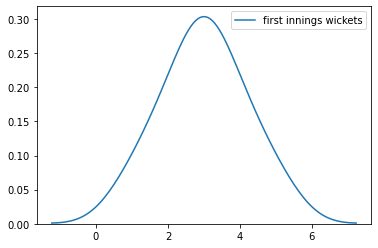

In [40]:
sns.kdeplot(first_innings["first innings wickets"])

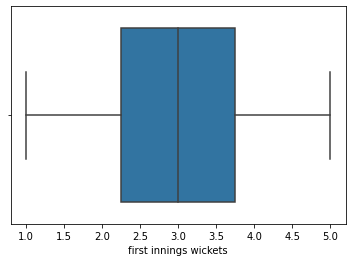

In [41]:
sns.boxplot(first_innings["first innings wickets"])

In [42]:
print("Average wicket fall between 91-120 balls(1st innings) in KKR VS KXIP matches  :{}".format(round(first_innings["first innings wickets"].mean())))

Average wicket fall between 91-120 balls(1st innings) in KKR VS KXIP matches  :3


- 2nd innings

In [43]:
second = overs[overs["inning"]==2]

In [44]:
second_innings = pd.DataFrame(second.groupby(["match_id"])["player_dismissed"].count())

second_innings.columns =["second innings wickets"]

second_innings

,second innings wickets
match_id,
11,0
48,3
532,1
560,4
589,1
608,5
7937,3
11142,1
11343,0


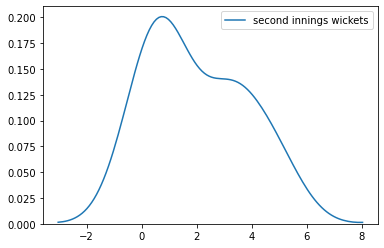

In [45]:
sns.kdeplot(second_innings["second innings wickets"])

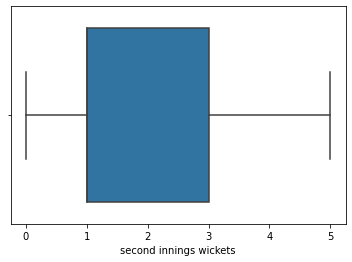

In [46]:
sns.boxplot(second_innings["second innings wickets"])

In [47]:
print("Average wicket fall between 91-120 balls(2nd innings) in KKR VS KXIP matches  :{}".format(round(second_innings["second innings wickets"].mean())))

Average wicket fall between 91-120 balls(2nd innings) in KKR VS KXIP matches  :2


## Confidence Interval

In [48]:
mean = wickets['wickets'].mean()
sd = wickets['wickets'].std()
n = len(wickets)

n

10

In [49]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.5734883511361751

In [50]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for the wickets that are expected to fall between 91th ball to 120th ball in the match :{}".format((lcb, ucb)))

95% Confidence Interval for the wickets that are expected to fall between 91th ball to 120th ball in the match :(4.0, 6.0)


From all the above analysis we can see that 2-3 wickets are generally fall down in each innings and also overall 4-6 wickets are generally fall in death overs . So based on all these insights we can predict that today also we can expect wicket loss to be between 4-6 wickets.

## Maxwell's contribution

In [51]:
punjab = KKR_KXIP[KKR_KXIP["batting_team"]=='Kings XI Punjab']

In [52]:
total_runs =pd.DataFrame(punjab.groupby(["match_id"])["total_runs"].sum())

total_runs.reset_index(level=0, inplace=True)

total_runs

,match_id,total_runs
0,11,170
1,48,167
2,532,155
3,560,183
4,589,138
5,608,157
6,7911,128
7,7937,221
8,11142,196
9,11343,186


In [53]:
maxwell = punjab[punjab["batsman"]=="GJ Maxwell"]
maxwell = maxwell[maxwell["wide_runs"]==0]

In [54]:
maxwell_score = pd.DataFrame(maxwell.groupby(["match_id"])["batsman_runs"].sum())

maxwell_score.columns = ["Maxwell's runs"]

maxwell_score.reset_index(level=0, inplace=True)

maxwell_score

,match_id,Maxwell's runs
0,11,25
1,48,44
2,532,33
3,560,43
4,589,4
5,608,68


In [55]:
final = pd.merge(maxwell_score, total_runs, on='match_id', how='inner')

final

,match_id,Maxwell's runs,total_runs
0,11,25,170
1,48,44,167
2,532,33,155
3,560,43,183
4,589,4,138
5,608,68,157


In [56]:
final["contribution"] = round((final["Maxwell's runs"]/final["total_runs"]) * 100)

final

,match_id,Maxwell's runs,total_runs,contribution
0,11,25,170,15.0
1,48,44,167,26.0
2,532,33,155,21.0
3,560,43,183,23.0
4,589,4,138,3.0
5,608,68,157,43.0


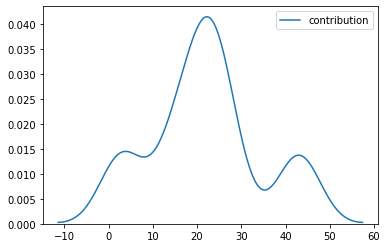

In [57]:
sns.kdeplot(final["contribution"])

In [58]:
print("Average contribution of Maxwell in KXIP's inning against KKR :{}%".format(round(final["contribution"].mean())))

Average contribution of Maxwell in KXIP's inning against KKR :22%


- Overall (Recent Years)

In [59]:
punjab_overall = matches[matches["batting_team"]=='Kings XI Punjab']

In [60]:
total_runs12 =pd.DataFrame(punjab_overall.groupby(["match_id"])["total_runs"].sum())

total_runs12.reset_index(level=0, inplace=True)

total_runs12

,match_id,total_runs
0,4,164
1,8,150
2,11,170
3,15,137
4,19,154
...,...,...
171,11328,168
172,11333,190
173,11339,174
174,11343,186


In [61]:
maxwell_overall = punjab_overall[punjab_overall["batsman"]=="GJ Maxwell"]
maxwell_overall = maxwell_overall[maxwell_overall["wide_runs"]==0]

In [62]:
maxwell_score_overall = pd.DataFrame(maxwell_overall.groupby(["match_id"])["batsman_runs"].sum())

maxwell_score_overall.columns = ["Maxwell's runs"]

maxwell_score_overall.reset_index(level=0, inplace=True)

maxwell_score_overall

,match_id,Maxwell's runs
0,4,44
1,8,43
2,11,25
3,15,0
4,19,10
5,22,40
6,26,31
7,32,0
8,42,6
9,46,20


In [63]:
final_overall = pd.merge(total_runs12,maxwell_score_overall , on='match_id', how='inner')

final_overall

,match_id,total_runs,Maxwell's runs
0,4,164,44
1,8,150,43
2,11,170,25
3,15,137,0
4,19,154,10
5,22,198,40
6,26,188,31
7,32,181,0
8,42,138,6
9,46,189,20


In [64]:
final_overall["contribution"] = round((final_overall["Maxwell's runs"]/final_overall["total_runs"]) * 100)

final_overall

,match_id,total_runs,Maxwell's runs,contribution
0,4,164,44,27.0
1,8,150,43,29.0
2,11,170,25,15.0
3,15,137,0,0.0
4,19,154,10,6.0
5,22,198,40,20.0
6,26,188,31,16.0
7,32,181,0,0.0
8,42,138,6,4.0
9,46,189,20,11.0


In [65]:
final_overall.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
contribution,50.0,13.22,13.988756,0.0,1.5,8.5,20.75,49.0


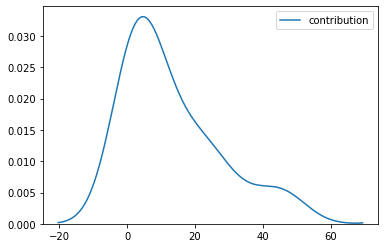

In [66]:
sns.kdeplot(final_overall["contribution"])

Text(0.5, 1.0, "Contribution of Maxwell in KXIP's Innings")

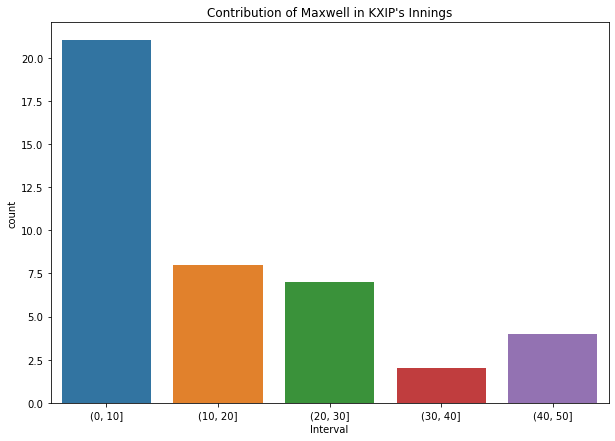

In [67]:
plt.figure(figsize=(10,7))
final_overall["Interval"] = pd.cut(final_overall["contribution"],[0,10,20,30,40,50])
sns.countplot(final_overall["Interval"])
plt.title("Contribution of Maxwell in KXIP's Innings")

In [68]:
print("Average contribution of Maxwell in KXIP's innings overall :{}%".format(round(final_overall["contribution"].mean())))

Average contribution of Maxwell in KXIP's innings overall :13%


Based on all the above analysis and recent form of Maxwell (overall and against KKR), we can predict that his estimated contribution to KXIP's total is expecte to be around 8-14% 

## No ball Analysis

In [69]:
nbcount = KKR_KXIP[KKR_KXIP["noball_runs"] >0]

In [70]:
nbcount.noball_runs.value_counts()

1    4
Name: noball_runs, dtype: int64

In [71]:
runs_from_noballs = nbcount.noball_runs.sum()

print("Runs from no ball delivery (overall) :",runs_from_noballs)

Runs from no ball delivery (overall) : 4


In [72]:
no_balls_per_match = pd.DataFrame(nbcount.groupby(["match_id"])["noball_runs"].count())

no_balls_per_match.columns = ["noball_count"]


print("No balls bowled in KKR VS KXIP matches :")
no_balls_per_match

No balls bowled in KKR VS KXIP matches :


,noball_count
match_id,
11,2
7911,1
11142,1


In [73]:
count = KKR_KXIP.match_id.nunique()

total_no_balls = nbcount.noball_runs.count()

Avg_no_ball = total_no_balls/count

print("On an average , No Balls bowled in KKR VS KXIP matches (overall) :",round(Avg_no_ball,2))

On an average , No Balls bowled in KKR VS KXIP matches (overall) : 0.4


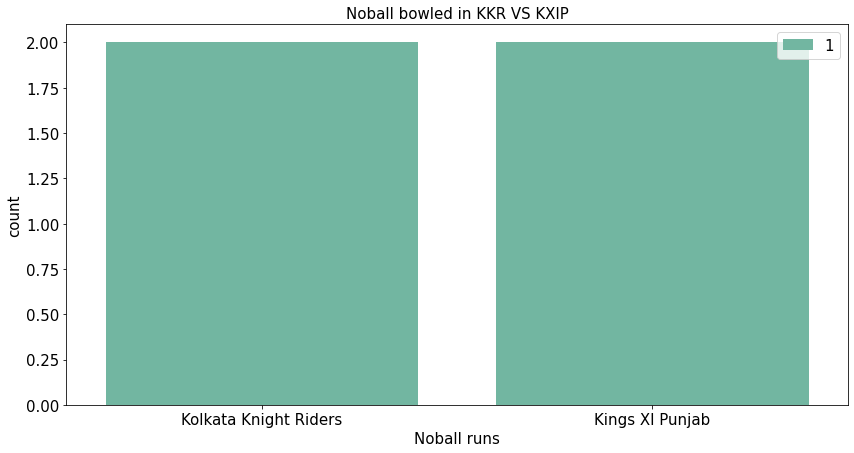

In [74]:
plt.figure(figsize = (14,7))
sns.countplot(nbcount['bowling_team'],palette='Set2',hue=nbcount['noball_runs'])
plt.title('Noball bowled in KKR VS KXIP',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Noball runs',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.legend(loc=1,fontsize=15)

plt.show()

Based on all the above analysis we can predict that 0-1 no ball are expected to be bowled in this match